### START

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Import Spotify 2023 data
Music = pd.read_csv('spotify-2023.csv')
Music

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### OVERVIEW OF DATA SET

In [149]:
# Show the Number of Rows and Columns
num_rows, num_columns = Music.shape
print("Number of Rows: ",num_rows)
print("Number of Columns: ",num_columns)

Number of Rows:  953
Number of Columns:  24


In [153]:
# Show what are the data types of each columns
print("Data Types: ")
print(Music.dtypes)

Data Types: 
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [174]:
# Look for the Missing Values
No_Value = Music.isna().sum()
print(No_Value[No_Value > 0])

in_shazam_charts    50
key                 95
dtype: int64


### BASIC DESCRIPTIVE STATISTICS

In [141]:
# In order to calculate the statistics mean, median, and standard deviation of "streams," the streams column must be defined and separated into a numerical value.
streams_column = Music['streams'].tolist()
streams_column_series = pd.Series(streams_column)
streams_column_series = pd.to_numeric(streams_column_series, errors='coerce')

# In case of NaN value
print("NaN values in data:", streams_column_series.isna().sum())
streams_column_series = streams_column_series.dropna()


NaN values in data: 1


In [137]:
# Calculation for the mean, median, and standard deviation for "streams".
streams_mean = streams_column_series.mean()
streams_median = streams_column_series.median()
streams_std = streams_column_series.std()

In [139]:
print("Streams Mean: ", streams_mean)
print("Streams Median: ", streams_median)
print("Streams Standard Deviation: ", streams_std)

Streams Mean:  514137424.93907565
Streams Median:  290530915.0
Streams Standard Deviation:  566856949.0388832


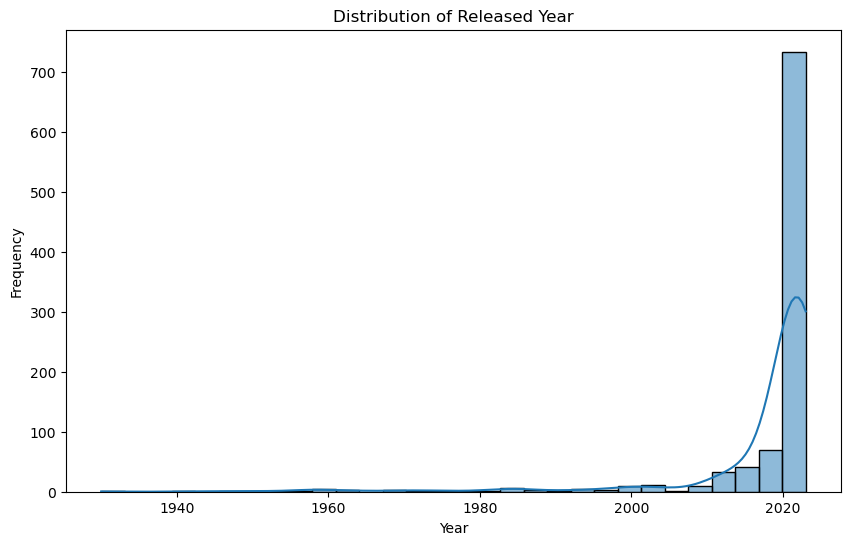

In [167]:
# Plot of Released Year
plt.figure(figsize=(10, 6))
sns.histplot(Music['released_year'], bins=30, kde=True)
plt.title('Distribution of Released Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

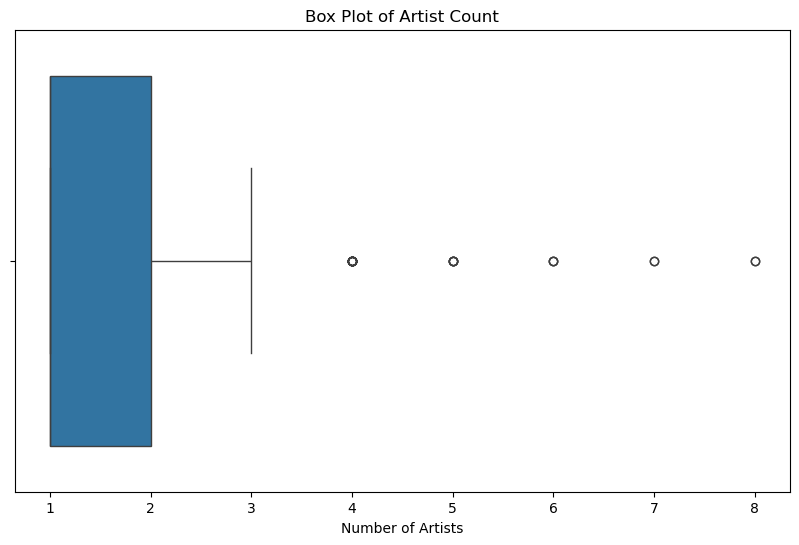

In [169]:
# Plot of Artist Count
plt.figure(figsize=(10, 6))
sns.boxplot(x=Music['artist_count'])
plt.title('Box Plot of Artist Count')
plt.xlabel('Number of Artists')
plt.show()

###  TOP PERFORMERS

In [235]:
# Shows the track with the highest number of streams along with the top 5 most streamed tracks
Music['streams'] = pd.to_numeric(Music['streams'], errors='coerce')
Top_Streams = Music.loc[Music['streams'].idxmax()]
Top_5 = Music.nlargest(5, 'streams')

print("Track with the highest number of streams:")
print(f"Track Name: {Top_Streams['track_name']}")
print("\nTop 5 Most Streamed Tracks:")
Top_5[['track_name', 'streams']]

Track with the highest number of streams:
Track Name: Blinding Lights

Top 5 Most Streamed Tracks:


,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


In [243]:
# Shows the top 5 most frequent artists based on the number of tracks in the dataset
Top_5_Artists = Music['artist(s)_name'].value_counts().head(5)

print("Top 5 Most Frequent Artists:")
Top_5_Artists

Top 5 Most Frequent Artists:


artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

### TEMPORAL 

### GENRE AND MUSIC CHARACTERIZATION

### PLATFORM POPULARITY

### ADVANCE ANALYSIS